0 1000 2000 3000 4000 5000 6000 7000 8000 9000 

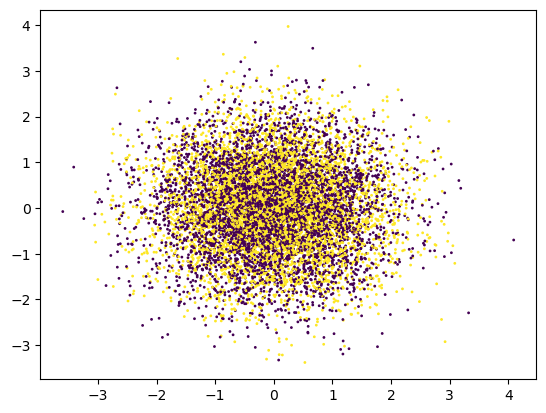

In [3]:

from scipy.stats import multivariate_normal, ortho_group
import os
import shutil
import numpy as np
import pandas as pd
from threading import Thread
import matplotlib.pyplot as plt

def gauss_kernel(z, mu, Sigma):
    f = np.exp(-0.5 * (z - mu).T @ np.linalg.inv(Sigma) @ (z - mu))
    return f

def gauss_kernel_func(x, a, feat_sub, mu, Sigma):
    f = sum([a[i]*gauss_kernel(x[feat_sub[i]], mu[i], Sigma[i]) for i in range(a.shape[0])])
    class_f = np.sign(f)/2 + 0.5
    if np.random.uniform() > 0.01:
        return class_f
    else:
        return 1 - class_f

def random_ortho_mat(dim):
    if dim == 1:
        U = np.array([[1.0]])
    else:
        U = ortho_group.rvs(dim=dim)
    return U

def generate_dataset():
    mode_dist = 0.5
    dim_feat = 1000

    scale_fac = mode_dist/np.sqrt(dim_feat)
    
    mu0 = -np.ones((dim_feat,))*scale_fac/2
    mu1 = np.ones((dim_feat,))*scale_fac/2

    fig = plt.figure()

    n_samples = 10000
    sample_list = []
    f_list = []

    for i in range(n_samples//2):
        x0 = mu0 + np.random.normal(loc=0.0, scale=1.0, size=(dim_feat,))
        f_list.append(0)
        sample_list.append([*x0, 0])

        x1 = mu1 + np.random.normal(loc=0.0, scale=1.0, size=(dim_feat,))
        f_list.append(1)
        sample_list.append([*x1, 1])

        if i % (n_samples//20) == 0:
            print(2*i, end=' ', flush=True)

    #plt.hist(f_list, bins=100)
    plt.scatter([x[0] for x in sample_list], [x[1] for x in sample_list], c=f_list, s=1)
    plt.show()
    df = pd.DataFrame(sample_list)

    if os.path.exists(f'class_data_n{dim_feat}_s{n_samples}.csv'):
        os.remove(f'class_data_n{dim_feat}_s{n_samples}.csv')
    
    df.to_csv(f'class_data_n{dim_feat}_s{n_samples}.csv', header=False, index=False)

if __name__ == '__main__':
    generate_dataset()